In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#lets load dataset

data_xls = pd.read_csv('/content/yellow_tripdata_2020-04.csv')
data_xls.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0
1,1.0,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0
2,1.0,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
3,1.0,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5
4,2.0,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1.0,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5


In [3]:
#lets see shape of dataset

data_xls.shape

(237993, 18)

In [4]:
#lets see decription of dataset

data_xls.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
count,218480.000000,218480.000000,237993.000000,218480.000000,237993.000000,237993.000000,218480.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000,237993.000000
mean,1.564949,1.296764,4.039981,1.034081,154.908422,150.361414,1.425673,11.666027,1.066739,0.487000,1.530229,0.220504,0.296331,16.408621,1.927536
std,0.495765,0.983595,294.879052,0.865044,70.749496,74.474108,0.555915,11.728767,1.260170,0.094993,2.295523,1.342351,0.045429,13.155858,1.072839
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-118.000000,-4.500000,-0.500000,-5.000000,-19.870000,-0.300000,-138.170000,-2.500000
25%,1.000000,1.000000,0.950000,1.000000,97.000000,75.000000,1.000000,5.500000,0.000000,0.500000,0.000000,0.000000,0.300000,9.800000,2.500000
50%,2.000000,1.000000,1.740000,1.000000,143.000000,143.000000,1.000000,8.000000,0.500000,0.500000,1.000000,0.000000,0.300000,12.800000,2.500000
75%,2.000000,1.000000,3.400000,1.000000,234.000000,233.000000,2.000000,13.000000,2.500000,0.500000,2.460000,0.000000,0.300000,18.360000,2.500000
max,2.000000,7.000000,126501.770000,99.000000,265.000000,265.000000,4.000000,903.020000,7.000000,1.100000,117.280000,98.750000,0.300000,903.320000,2.500000


In [5]:
#lets check the datatypes and non-null count in dataset

data_xls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237993 entries, 0 to 237992
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               218480 non-null  float64
 1   tpep_pickup_datetime   237993 non-null  object 
 2   tpep_dropoff_datetime  237993 non-null  object 
 3   passenger_count        218480 non-null  float64
 4   trip_distance          237993 non-null  float64
 5   RatecodeID             218480 non-null  float64
 6   store_and_fwd_flag     218480 non-null  object 
 7   PULocationID           237993 non-null  int64  
 8   DOLocationID           237993 non-null  int64  
 9   payment_type           218480 non-null  float64
 10  fare_amount            237993 non-null  float64
 11  extra                  237993 non-null  float64
 12  mta_tax                237993 non-null  float64
 13  tip_amount             237993 non-null  float64
 14  tolls_amount           237993 non-nu

In [6]:
#lets check the unique values in the dataset

data_xls.nunique()

VendorID                      2
tpep_pickup_datetime     218054
tpep_dropoff_datetime    218182
passenger_count               8
trip_distance              2952
RatecodeID                    7
store_and_fwd_flag            2
PULocationID                250
DOLocationID                259
payment_type                  4
fare_amount                5111
extra                        18
mta_tax                       4
tip_amount                 1445
tolls_amount                102
improvement_surcharge         3
total_amount               6673
congestion_surcharge          3
dtype: int64

In [7]:
#lets check the number of null values in dataset

data_xls.isnull().sum()

VendorID                 19513
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          19513
trip_distance                0
RatecodeID               19513
store_and_fwd_flag       19513
PULocationID                 0
DOLocationID                 0
payment_type             19513
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
dtype: int64

# **Exploratory Data Analysis**

**Univariate Analysis**

Number of null values in Vendor ID is: 19513


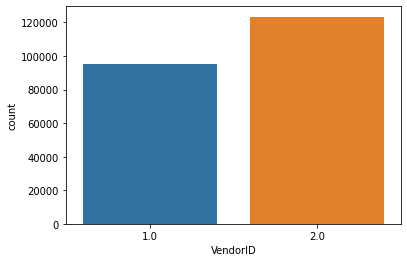

In [8]:
print('Number of null values in Vendor ID is:', data_xls.VendorID.isnull().sum())
sns.countplot(x='VendorID', data=data_xls)

From above we can observe that the number of vendor id with 2 is more than the vendor id 1. Also the null values in 'VendorID' feature is 19513

Number of null values in passenger count is: 19513


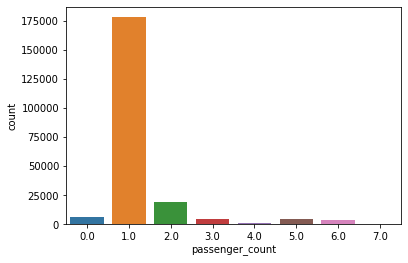

In [9]:
print('Number of null values in passenger count is:', data_xls.passenger_count.isnull().sum())
sns.countplot(x='passenger_count', data=data_xls)

From above plot we can observe that the single passenger rides were highest. Also the null values in 'passenger_count' attribute is 19513

In [10]:
print(data_xls.trip_distance.value_counts())

0.00     6223
0.90     4647
0.80     4515
0.70     4501
1.00     4474
         ... 
24.72       1
37.36       1
36.70       1
21.85       1
38.74       1
Name: trip_distance, Length: 2952, dtype: int64


We see there are 6223 rides with zero miles distance

In [11]:
# we convert the pickup time and dropoff time to datetime object from object type

data_xls.tpep_pickup_datetime=pd.to_datetime(data_xls.tpep_pickup_datetime)
data_xls.tpep_dropoff_datetime=pd.to_datetime(data_xls.tpep_dropoff_datetime)
print(data_xls.tpep_pickup_datetime.dtype)
print(data_xls.tpep_dropoff_datetime.dtype)

datetime64[ns]
datetime64[ns]


In [12]:
# we create new features from pickup time and dropoff time to get more clear insights 
data_xls['pickup_day']=data_xls['tpep_pickup_datetime'].dt.day_name()
data_xls['dropoff_day']=data_xls['tpep_dropoff_datetime'].dt.day_name()
data_xls['pickup_hour']=data_xls['tpep_pickup_datetime'].dt.hour
data_xls['dropoff_hour']=data_xls['tpep_dropoff_datetime'].dt.hour
data_xls['pickup_month']=data_xls['tpep_pickup_datetime'].dt.month
data_xls['dropoff_month']=data_xls['tpep_dropoff_datetime'].dt.month
data_xls.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,1.0,2020-04-01 00:41:22,2020-04-01 01:01:53,1.0,1.20,1.0,N,41,24,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,Wednesday,Wednesday,0,1,4,4
1,1.0,2020-04-01 00:56:00,2020-04-01 01:09:25,1.0,3.40,1.0,N,95,197,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0,Wednesday,Wednesday,0,1,4,4
2,1.0,2020-04-01 00:00:26,2020-04-01 00:09:25,1.0,2.80,1.0,N,237,137,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5,Wednesday,Wednesday,0,0,4,4
3,1.0,2020-04-01 00:24:38,2020-04-01 00:34:38,0.0,2.60,1.0,N,68,142,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5,Wednesday,Wednesday,0,0,4,4
4,2.0,2020-04-01 00:13:24,2020-04-01 00:18:26,1.0,1.44,1.0,Y,263,74,1.0,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5,Wednesday,Wednesday,0,0,4,4


We have created the following features:

* pickup_day and dropoff_day which will contain the name of the day on which the ride was taken.
* pickup_day_no and dropoff_day_no which will contain the day number instead of characters with      Monday=0 and Sunday=6.
* pickup_hour and dropoff_hour with an hour of the day in the 24-hour format.
* pickup_month and dropoff_month with month number with January=1 and December=12

We analyse the individual feature and get some insights

In [13]:
# we drop the unecessary columns

data_xls.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1, inplace=True)

In [14]:
data_xls.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month
0,1.0,1.0,1.20,1.0,N,41,24,2.0,5.5,0.5,0.5,0.00,0.0,0.3,6.80,0.0,Wednesday,Wednesday,0,1,4,4
1,1.0,1.0,3.40,1.0,N,95,197,1.0,12.5,0.5,0.5,2.75,0.0,0.3,16.55,0.0,Wednesday,Wednesday,0,1,4,4
2,1.0,1.0,2.80,1.0,N,237,137,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5,Wednesday,Wednesday,0,0,4,4
3,1.0,0.0,2.60,1.0,N,68,142,1.0,10.0,3.0,0.5,1.00,0.0,0.3,14.80,2.5,Wednesday,Wednesday,0,0,4,4
4,2.0,1.0,1.44,1.0,Y,263,74,1.0,6.5,0.5,0.5,3.00,0.0,0.3,13.30,2.5,Wednesday,Wednesday,0,0,4,4


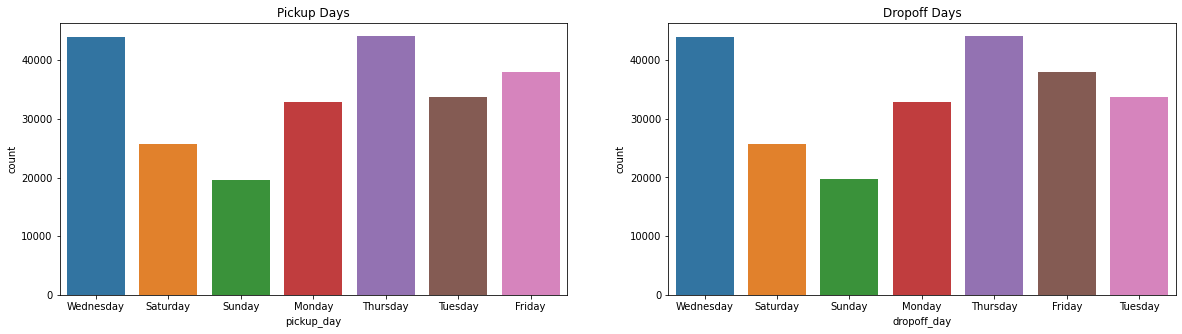

In [15]:
#lets plot the pickup days and drop off days count and see 

figure,(ax1,ax2)=plt.subplots(ncols=2,figsize=(20,5))
ax1.set_title('Pickup Days')
ax=sns.countplot(x="pickup_day",data=data_xls,ax=ax1)
ax2.set_title('Dropoff Days')
ax=sns.countplot(x="dropoff_day",data=data_xls,ax=ax2)

We can clearly see that wednesday and thursday seem to be the busiest days for both pickup and drop off

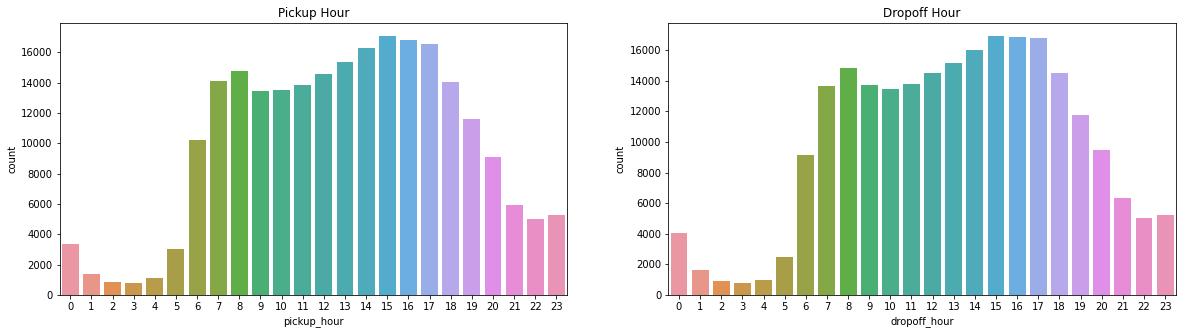

In [16]:
#lets plot the pickup hour and drop hour count and see

figure,(ax3,ax4)=plt.subplots(ncols=2,figsize=(20,5))
ax3.set_title('Pickup Hour')
ax=sns.countplot(x="pickup_hour",data=data_xls,ax=ax3)
ax4.set_title('Dropoff Hour')
ax=sns.countplot(x="dropoff_hour",data=data_xls,ax=ax4)

We can see that - 
* There is a sudden rise in the pickup hours from 6AM and it continued till 8AM. This is may be due to early morning office hours
* Evening between 3PM to 5PM seem to be the busiest hours.

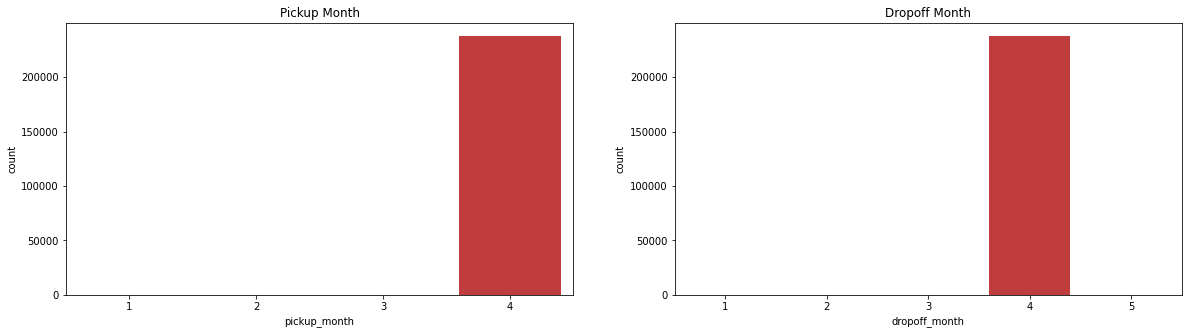

In [17]:
#lets plot the pickup month and dropoff month count

figure,(ax5,ax6)=plt.subplots(ncols=2,figsize=(20,5))
ax5.set_title('Pickup Month')
ax=sns.countplot(x="pickup_month",data=data_xls,ax=ax5)
ax6.set_title('Dropoff Month')
ax=sns.countplot(x="dropoff_month",data=data_xls,ax=ax6)

We can see that all the rides in the given dataset took place in April month

1.0     216080
5.0       1025
2.0       1025
4.0        175
3.0        158
99.0        15
6.0          2
Name: RatecodeID, dtype: int64
Number of null values are: 19513


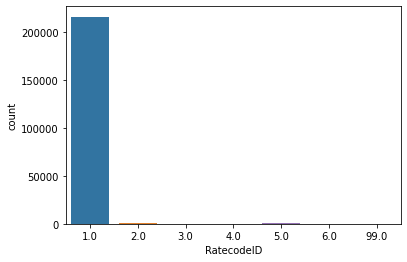

In [18]:
#lets plot the RatecodeID

print(data_xls.RatecodeID.value_counts())
print('Number of null values are:',data_xls.RatecodeID.isnull().sum())
sns.countplot(x='RatecodeID', data=data_xls)

We can clearly see that RatecodeID 1 i.e., standard rate is overwhelmingly more than others.

N    216629
Y      1851
Name: store_and_fwd_flag, dtype: int64


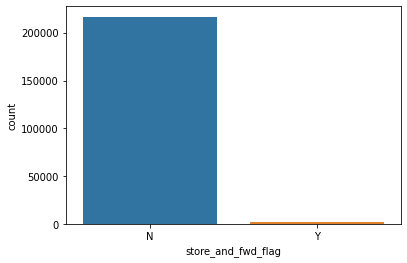

In [19]:
# Lets plot store and forward flag 

print(data_xls.store_and_fwd_flag.value_counts())
sns.countplot(x='store_and_fwd_flag', data=data_xls)

We can see that a overwhelming number of trips are not a store and forward trip

1.0    131151
2.0     83038
3.0      2910
4.0      1381
Name: payment_type, dtype: int64


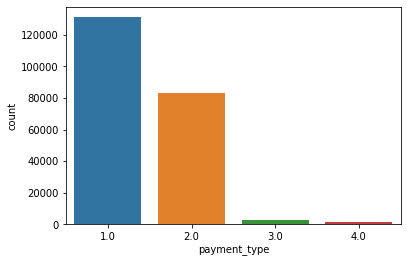

In [20]:
# lets plot the payment type 

print(data_xls.payment_type.value_counts())
sns.countplot(x='payment_type', data=data_xls)

We can see that passengers paid through the payment mode of Credit card(1.0) more than any other payment mode. So giving promo offers in credit card payment may attract more passengers to travel.

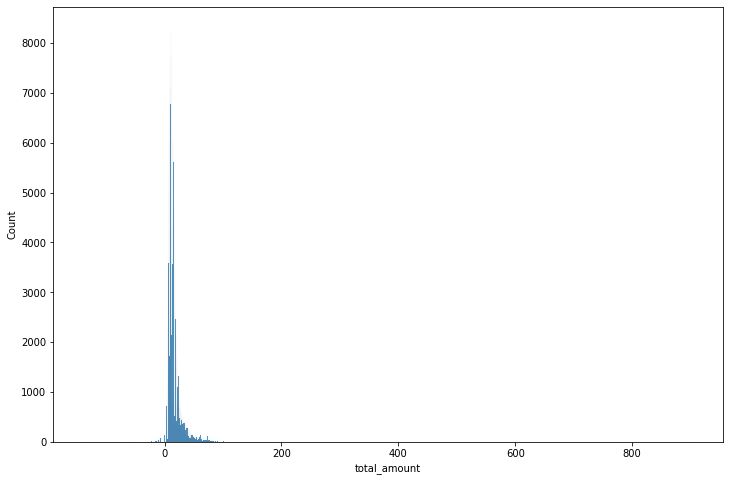

In [21]:
# lets plot the total amount

plt.figure(figsize=(12,8))
sns.histplot(data=data_xls, x='total_amount')

We can see the total amount is almost less than 100 for almost all trips. So keeping the total amount of the trips below 100 may increase the number of trips.

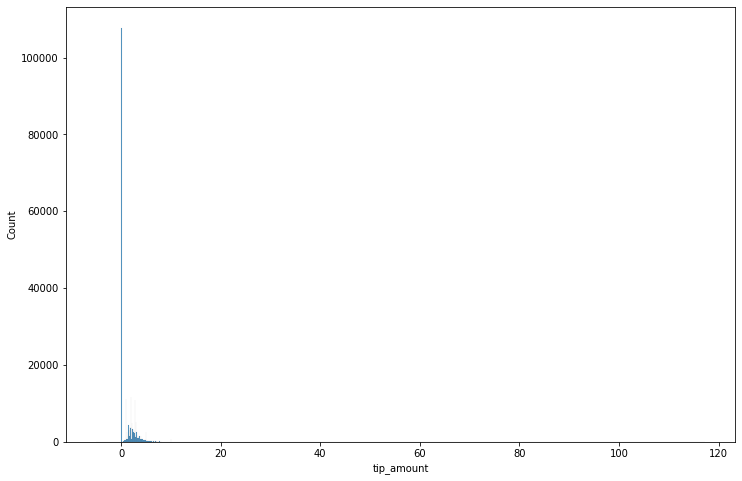

In [22]:
# lets plot the tips amount

plt.figure(figsize=(12,8))
sns.histplot(data=data_xls, x='tip_amount')

**Bi variate Analysis**
*  we will see the relationships between the individual features

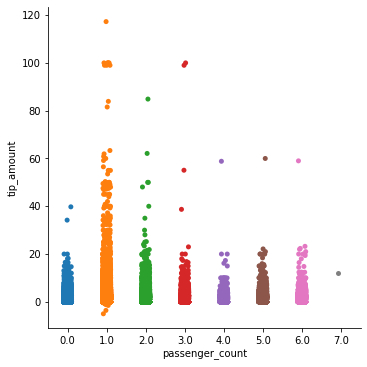

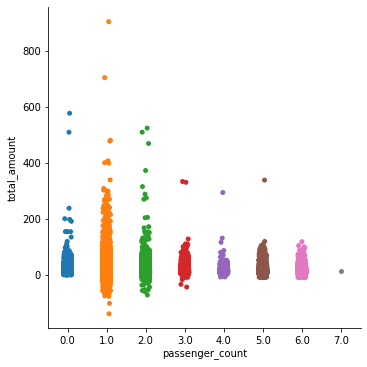

In [23]:

sns.catplot(x="passenger_count", y='tip_amount', data=data_xls)
sns.catplot(x="passenger_count", y='total_amount' ,data=data_xls)


* We can see the tip amount is high when passenger count in the trip is just one.
* We can also see that the total amount paid is high when passenger count is one.

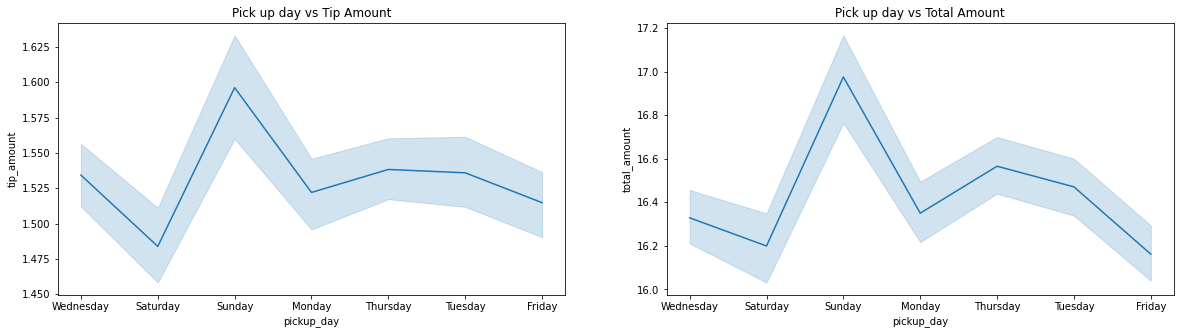

In [24]:
figure,(ax7,ax8)=plt.subplots(ncols=2,figsize=(20,5))
ax7.set_title('Pick up day vs Tip Amount')
ax=sns.lineplot(x="pickup_day",y='tip_amount',data=data_xls,ax=ax7)
ax8.set_title('Pick up day vs Total Amount')
ax=sns.lineplot(x="pickup_day",y='total_amount',data=data_xls,ax=ax8)

We can see that the tip amount is highest on sundays and lowest on saturdays for pickup days and also the total amount is also highest on sundays while it is lowest on saturdays. So it is better to run less trips on saturdays to increase the profits.

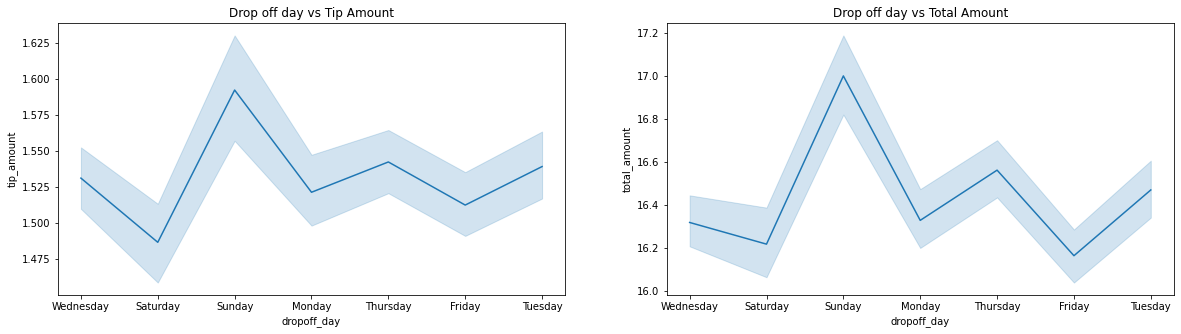

In [25]:
figure,(ax9,ax10)=plt.subplots(ncols=2,figsize=(20,5))
ax9.set_title('Drop off day vs Tip Amount')
ax=sns.lineplot(x="dropoff_day",y='tip_amount',data=data_xls,ax=ax9)
ax10.set_title('Drop off day vs Total Amount')
ax=sns.lineplot(x="dropoff_day",y='total_amount',data=data_xls,ax=ax10)

We can observe the same trend for highest tip amount on Sundays and also the highest total amount collected is on Sundays for drop off days. 
From the above two plots we can clearly observe that by dropping the number of rides on satursays we can increase profits.

In [26]:
#pick up and drop points that has highest tip
data_xls.loc[data_xls.tip_amount == data_xls.tip_amount.max()]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month
58516,2.0,1.0,109.31,4.0,N,132,161,1.0,578.5,1.0,0.5,117.28,6.12,0.3,703.7,0.0,Wednesday,Wednesday,17,19,4,4


In [28]:
#load datset that has location names for location ids

data_xls_1 = pd.read_csv('/content/taxi+_zone_lookup.csv')
data_xls_1.head()

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [29]:
#Maximum tip amount

data_xls.loc[data_xls.tip_amount == data_xls.tip_amount.max()]

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,pickup_day,dropoff_day,pickup_hour,dropoff_hour,pickup_month,dropoff_month
58516,2.0,1.0,109.31,4.0,N,132,161,1.0,578.5,1.0,0.5,117.28,6.12,0.3,703.7,0.0,Wednesday,Wednesday,17,19,4,4


In [30]:
# Finding the location for the corresponding location ids
pick_loc = data_xls_1.loc[data_xls_1.LocationID == 132]

drop_loc = data_xls_1.loc[data_xls_1.LocationID == 161]

f = pd.concat([pick_loc, drop_loc])
f

,LocationID,Borough,Zone,service_zone
131,132,Queens,JFK Airport,Airports
160,161,Manhattan,Midtown Center,Yellow Zone
